<a href="https://colab.research.google.com/github/dhanushkumarms/kovaico_dhanushkumar/blob/main/kovaico_dhanushkumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Daily Public Transport Passenger Journeys Forecasting by Service Type**

## 22z317 - Dhanushkumar M

## Kovai.co - Data Scientist Intern Task Round

**1. Understanding of Given Dataset**

Dataset Name : *Daily_Public_Transport_Passenger_Journeys_by_Service_Type.csv*

 - It is a daily record of how people use different public transport services over time.

 - Each row represents one day, and each column captures how many passengers travelled through a specific service category.

 - In simple, it is a day-to-day record how busy each transport service was.

- Total Number of Instances : **1919**
- Total Number of Features : **7**

The dataset contains **7 features**:

1. **Date**– the calendar date of the observation
2. **Local Route** – number of passengers using standard local bus routes
3. **Light Rail** – passengers who travelled via the city’s light rail network
4. **Peak Service** – services that operate during peak hours (morning/evening)
5. **Rapid Route** – express/fast bus services used
6. **School** – records related to school transportation
7. **Other** – additional or uncategorized transport services (special serice buses)

**2. Installation & Setup**

In [ ]:
!pip install statsmodels
# installing required package for time series modelling

In [15]:
import pandas as pd   # for dataset handling
import numpy as np    # for numerical operations
import matplotlib.pyplot as plt  # for visualizations
import seaborn as sns  # for advanced statistical plots
from statsmodels.tsa.statespace.sarimax import SARIMAX  # chosen time series forecasting model

**3. Uploading Dataset**

In [7]:
file_path = "/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv"
df = pd.read_csv(file_path)
print("Dataset Uploaded Successfully!!!")

Dataset Uploaded Successfully!!!


In [8]:
df.head() # to display the top 5 rows of the dataset

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


**4. Structure of the Dataset**

In [13]:
print("Dataset Information")
df.info() # to show info like features, total no of records, type of attributes
print("Total Number of Missing values in each Feature")
df.isna().sum() # total number of missing values in each column

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
Total Number of Missing values in each Feature


,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,20


*Transport Category "Others" has 20 MISSING VALUES*

**5. Data Cleaning & Preparation**

In [19]:
# converting  date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# to sort the dataset chronologically
df = df.sort_values('Date').reset_index(drop=True)

#  to fill missing values in the 'Other' column using forward-fill
df['Other'] = df['Other'].fillna(method='ffill')

print("Data cleaning completed successfully!")

Data cleaning completed successfully!


/tmp/ipython-input-2954450909.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Other'] = df['Other'].fillna(method='ffill')


**6. Exploratory Data Analysis (EDA)**

**6.1 Statistical summary of numerical columns**

In [21]:
print("Descriptive statistics for the dataset:")
df.describe()

Descriptive statistics for the dataset:


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1911.000000
mean,2022-02-13 12:00:00,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.102564
min,2019-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-10-22 06:00:00,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,2022-02-13 12:00:00,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,2023-06-07 18:00:00,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,2024-09-29 00:00:00,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000
std,NaN,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.750906


**6.2 Distribution Plots**

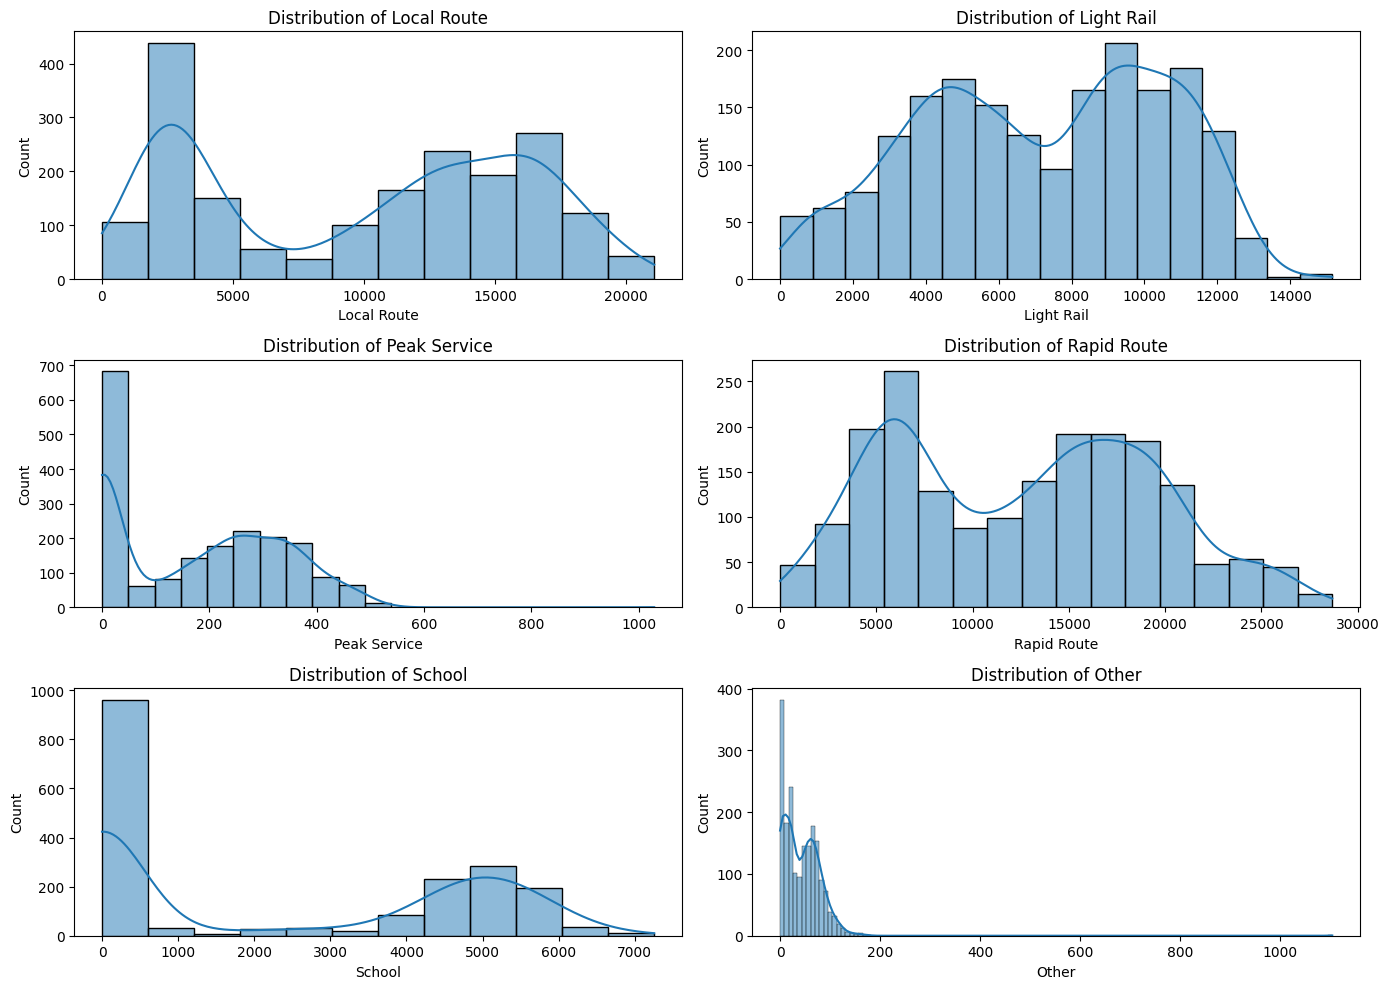

In [22]:
services = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other'] # 6 types of services

plt.figure(figsize=(14,10))
for i, col in enumerate(services, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}") # distribution for each type of service
plt.tight_layout()
plt.show()

**8.3 Trend Over Time**

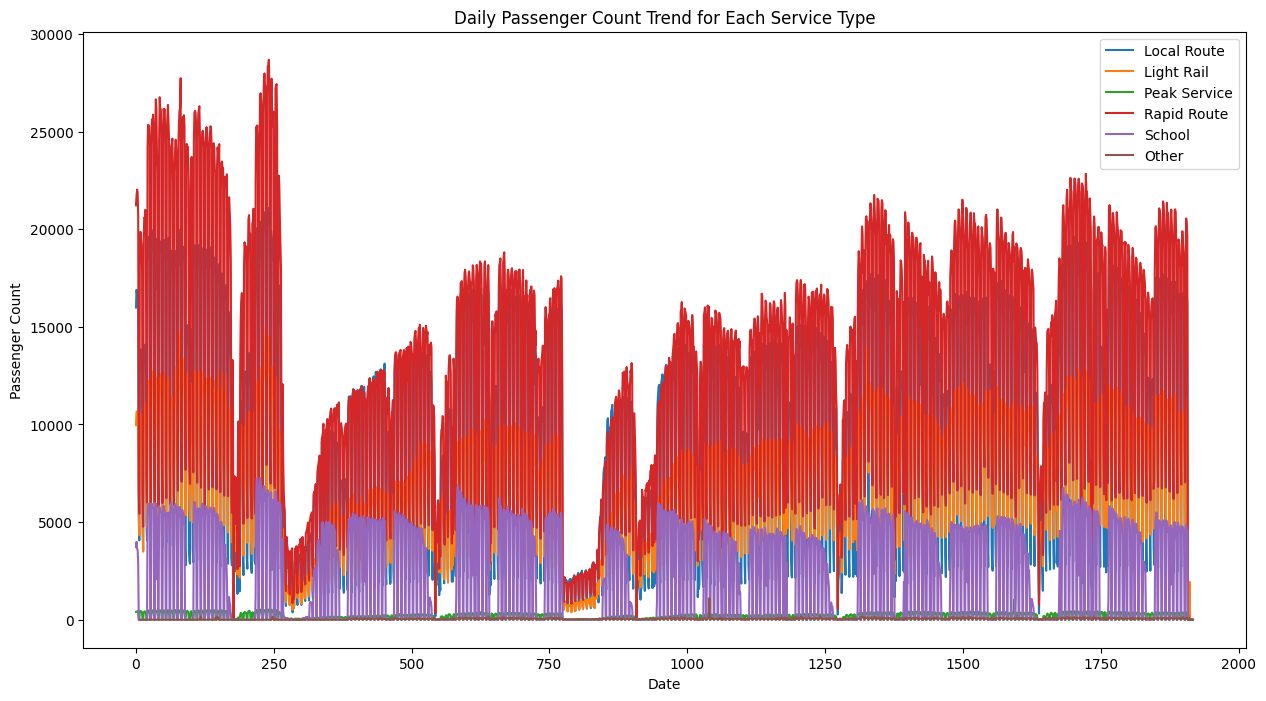

In [23]:
#time trend of each service type
plt.figure(figsize=(15,8))
for col in services:
    sns.lineplot(x=df.index, y=df[col], label=col)

plt.title("Daily Passenger Count Trend for Each Service Type")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.show()


**6.4 Correlation Heatmap**

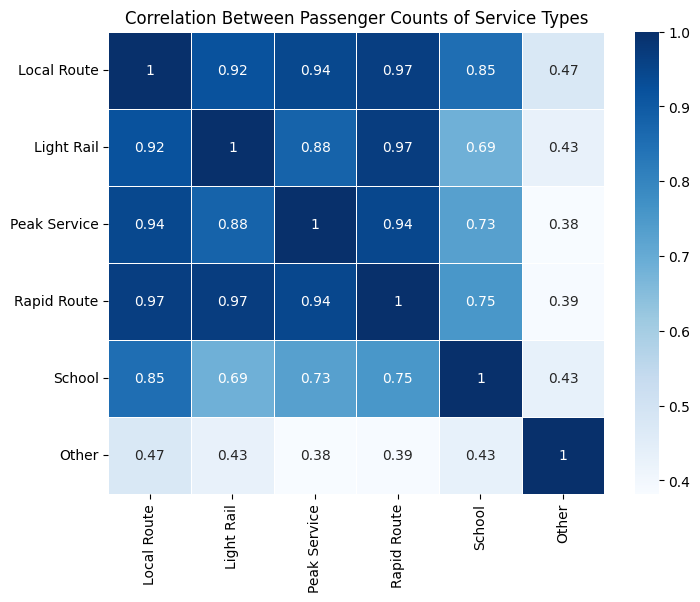

In [24]:
# heatmap for understanding correlations between services
plt.figure(figsize=(8,6))
sns.heatmap(df[services].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Between Passenger Counts of Service Types")
plt.show()

**6.5 Total Ridership Trend**

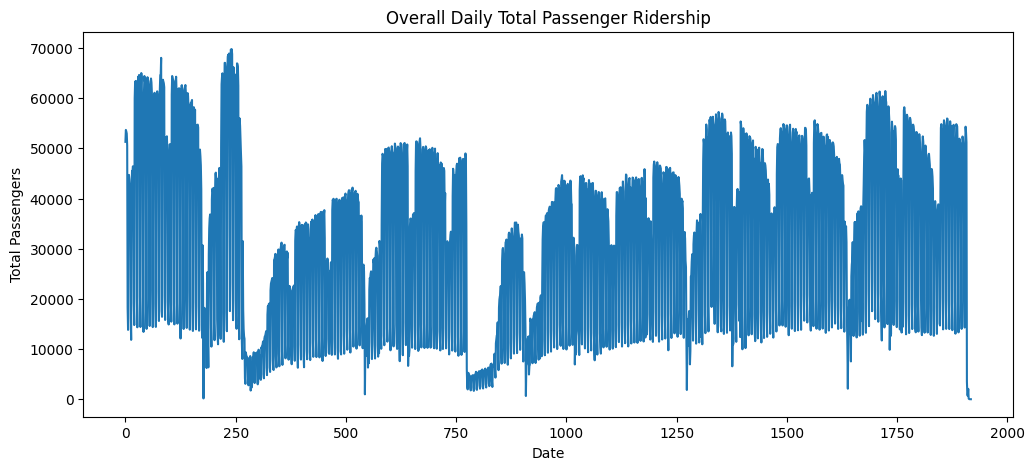

In [26]:
#Total passenger ridership over time
df['Total'] = df[services].sum(axis=1)
plt.figure(figsize=(12,5))
sns.lineplot(x=df.index, y=df['Total'])
plt.title("Overall Daily Total Passenger Ridership")
plt.xlabel("Date")
plt.ylabel("Total Passengers")
plt.show()

**6.6 Weekly Pattern Analysis**

/tmp/ipython-input-4003169902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['day_of_week'], y=df['Total'], palette="Set2")


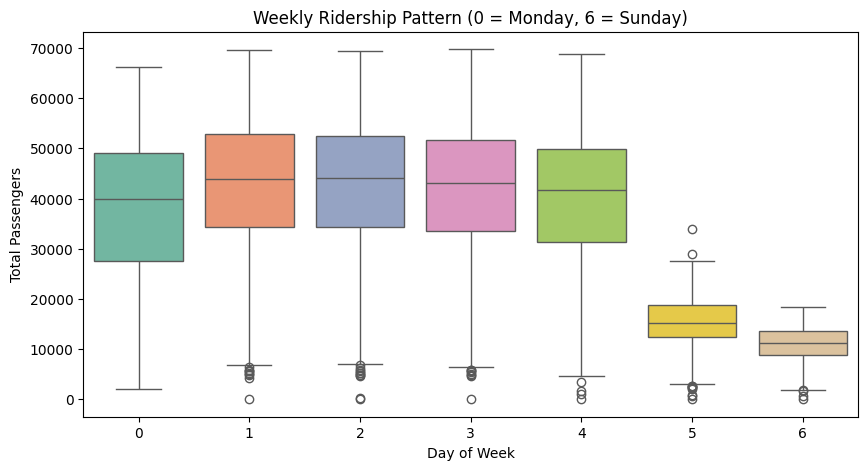

In [30]:
# Weekly ridership pattern
df['day_of_week'] = df.index.dayofweek  # 0 = Monday, 6 = Sunday

plt.figure(figsize=(10,5))
sns.boxplot(x=df['day_of_week'], y=df['Total'], palette="Set2")
plt.title("Weekly Ridership Pattern (0 = Monday, 6 = Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Total Passengers")
plt.show()


**6.7 Seasonal Decomposition**

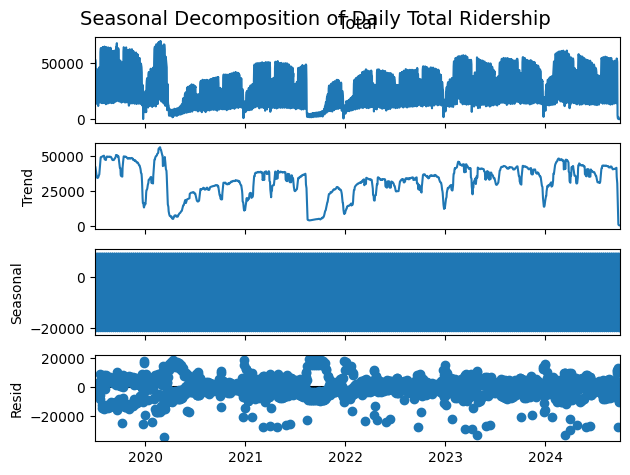

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on Total passengers
# period=7 because we expect weekly seasonality in daily data
result = seasonal_decompose(df['Total'], model='additive', period=7)


result.plot()
plt.suptitle("Seasonal Decomposition of Daily Total Ridership", fontsize=14)
plt.show()


**7. Forecasting Using SARIMA**